<a href="https://colab.research.google.com/github/VoXuanLanh/BT_fuzzy_Logic/blob/main/Palm_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()  # Chọn tệp kaggle.json vừa tải về


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vxunlanzz","key":"fbb5836fd9d1fe9d043b0f5a27b7c58a"}'}

In [5]:
import os
import shutil

# Tạo thư mục .kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# Di chuyển kaggle.json vào thư mục đó
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Cấp quyền đọc file cho an toàn
os.chmod("/root/.kaggle/kaggle.json", 600)


In [6]:
!kaggle datasets download -d shyambhu/hands-and-palm-images-dataset


Dataset URL: https://www.kaggle.com/datasets/shyambhu/hands-and-palm-images-dataset
License(s): DbCL-1.0


In [7]:
!unzip hands-and-palm-images-dataset.zip -d ./palm_dataset


Streaming output truncated to the last 5000 lines.
  inflating: ./palm_dataset/Hands/Hands/Hand_0006508.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006509.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006510.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006511.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006512.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006513.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006514.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006515.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006516.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006517.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006518.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006519.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006520.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006521.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006522.jpg  
  inflating: ./palm_dataset/Hands/Hands/Hand_0006523.jpg  
  inf

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
data_dir = "/content/palm_dataset/Hands"  # đường dẫn đến thư mục chứa các lớp ảnh
img_size = (64, 64)  # resize ảnh về kích thước phù hợp với ANN
X, y = [], []

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            try:
                img = load_img(img_path, target_size=img_size, color_mode='rgb')
                img_array = img_to_array(img) / 255.0  # chuẩn hóa ảnh
                X.append(img_array)
                y.append(label)
            except:
                print(f"Lỗi ảnh: {img_path}")


In [49]:
X = np.array(X)
y = np.array(y)
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
num_classes = len(le.classes_)
img_flatten=X.reshape(X.shape[0], 64*64*3)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(img_flatten, y, test_size=0.2, random_state=42, stratify=y)
print("Số lớp:", len(le.classes_))
print("Danh sách lớp:", class_names)

Số lớp: 1
Danh sách lớp: ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14']


In [76]:
X_train = X_train.reshape(X_train.shape[0], 64*64*3)
X_train = X_train.astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 64*64*3)
X_test = X_test.astype('float32')/255

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(X_train.shape)
print(len(y_train))
print(X_train.ndim)
print(X_test.shape)
print(len(y_test))
print(X_test.ndim)


(8860, 12288)
8860
2
(2216, 12288)
2216
2


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential([
    Dense(512, activation='relu', input_shape=(12288,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/100
139/139 ━━

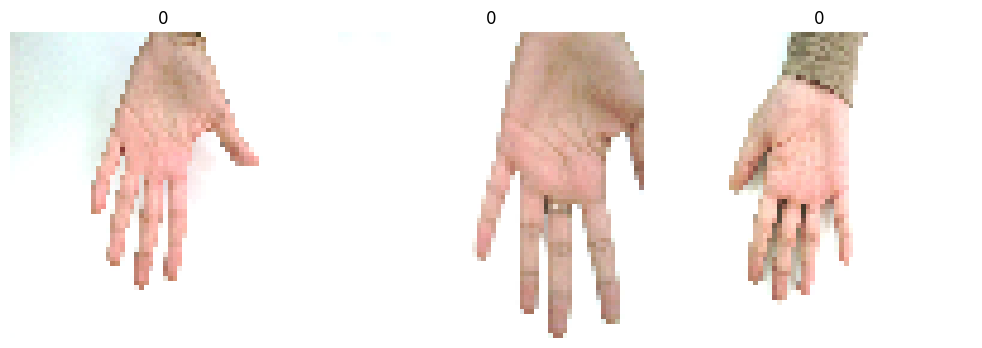

In [64]:
import matplotlib.pyplot as plt
import random

# Lấy ngẫu nhiên 3 ảnh từ danh sách
sample_indices = random.sample(range(len(X)), 3)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[idx].reshape(64, 64,3), cmap='gray')
    plt.title(le.inverse_transform([np.argmax(y_train[idx])])[0])
    plt.axis('off')

plt.tight_layout()
plt.show()


Độ chính xác trên tập test: 100.00%
 6/70 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


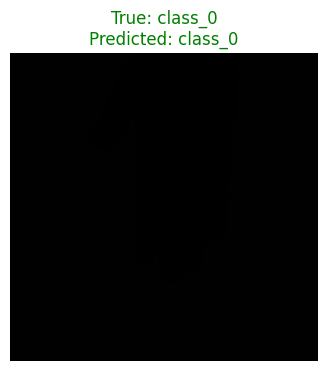

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Đánh giá độ chính xác toàn bộ tập test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Độ chính xác trên tập test: {test_accuracy * 100:.2f}%")

# Dự đoán nhãn cho toàn bộ tập test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Đặt index ảnh cần kiểm tra
i = 6
image = X_test[i]
true_label_index = y_true[i]

# Dự đoán ảnh i
prediction = model.predict(np.expand_dims(image, axis=0))  # shape (1, 12288)
predicted_class_index = np.argmax(prediction)

# Gán nhãn theo `class_names` từ LabelEncoder
true_label = class_names[true_label_index]
predicted_label = class_names[predicted_class_index]

# Hiển thị ảnh (đưa từ flatten về ảnh RGB 64x64)
img_display = (image.reshape(64, 64, 3) * 255).astype('uint8')

plt.figure(figsize=(4, 4))
plt.imshow(img_display)
plt.title(f"True: {true_label}\nPredicted: {predicted_label}",
          color='green' if predicted_class_index == true_label_index else 'red')
plt.axis('off')
plt.show()
